In [2]:
# Grab Public Apache access log
! wget http://www.almhuette-raith.at/apache-log/access.log

--2021-10-27 17:46:16--  http://www.almhuette-raith.at/apache-log/access.log
Resolving www.almhuette-raith.at (www.almhuette-raith.at)... 91.143.107.26
Connecting to www.almhuette-raith.at (www.almhuette-raith.at)|91.143.107.26|:80... connected.
HTTP request sent, awaiting response... 
  HTTP/1.1 200 OK
  Date: Wed, 27 Oct 2021 22:46:16 GMT
  Server: Apache/1.3.34 (Debian) mod_perl/1.29
  Last-Modified: Wed, 27 Oct 2021 22:45:02 GMT
  ETag: "32a07ca-760e0d7-6179d66e"
  Accept-Ranges: bytes
  Content-Length: 123789527
  Keep-Alive: timeout=2, max=100
  Connection: Keep-Alive
  Content-Type: text/plain; charset=iso-8859-1
Length: 123789527 (118M) [text/plain]
Saving to: ‘access.log’

access.log          100%[===================>] 118.05M  2.35MB/s    in 59s     

2021-10-27 17:47:15 (2.00 MB/s) - ‘access.log’ saved [123789527/123789527]



In [32]:
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
df = pd.read_csv('access.log',
              sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
              engine='python',
              usecols=[0, 3, 4, 5, 6, 7, 8],
              names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
              na_values='-',
              header=None
                )


In [5]:
df.ip.value_counts().head(5)

193.106.31.130    340874
197.52.128.37      40777
37.239.22.2        16101
45.133.1.60         7514
173.255.176.5       5220
Name: ip, dtype: int64

In [7]:
df.status.value_counts().head(5)

200    521309
206     64245
404     45392
303      4505
301      1278
Name: status, dtype: int64

In [8]:
df.user_agent.value_counts().head(5)

"Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.0)"                                                                        340874
"Mozilla/5.0 (Windows NT 6.1; Trident/7.0; rv:11.0) like Gecko"                                                              42613
"Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.0)"                                                                         16086
"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.85 Safari/537.36 OPR/32.0.1948.45"      8756
"Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:28.0) Gecko/20100101 Firefox/28.0"                                                  7812
Name: user_agent, dtype: int64

In [9]:
df.referer.value_counts().head(5)

"-"                                            472933
"http://www.almhuette-raith.at/apache-log/"     61526
"http://www.almhuette-raith.at/"                31447
"http://www.almhuette-raith.at"                 15806
"http://almhuette-raith.at/"                    11031
Name: referer, dtype: int64

In [10]:
df.request.value_counts().head(5)

"POST /administrator/index.php HTTP/1.0"                          344882
"GET /apache-log/access.log HTTP/1.1"                              86152
"GET /administrator/index.php HTTP/1.1"                            15652
"GET / HTTP/1.1"                                                   14148
"GET /index.php?option=com_contact&view=contact&id=1 HTTP/1.1"     11251
Name: request, dtype: int64

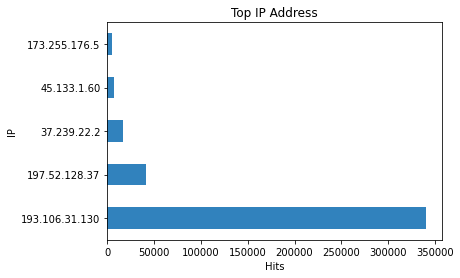

In [36]:
top_ip_count = df.ip.value_counts().head(5)
top_ip_count.plot(kind="barh", colormap="tab20c")
plt.title("Top IP Address")
plt.xlabel("Hits")
plt.ylabel("IP")
plt.show()

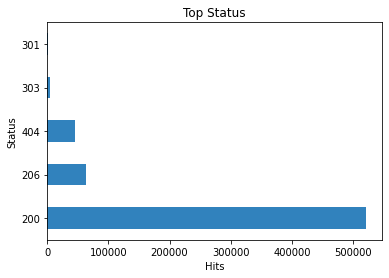

In [37]:
top_status_count = df.status.value_counts().head(5)
top_status_count.plot(kind="barh", colormap="tab20c")
plt.title("Top Status")
plt.xlabel("Hits")
plt.ylabel("Status")
plt.show()